# Import

In [ ]:
import numpy as np
import scipy.integrate as integ
import scipy.interpolate as i2
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from astropy import units as u
from astropy import constants as c

import scipy.optimize as o
try:
    import cPickle as pickle
except ImportError:
    import pickle
    
import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")
sns.set_style("ticks",{'axes.grid' : True})
import scienceplots
plt.style.use('science')
f = 16

In [32]:
## SET CONSTANTS
rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
mu_0 = 1.2566*10**(-6)

# Define Normalizations
r1 = 0.1

## Define OMEGA0:
bb = 10000
v0 = bb/np.sqrt(r1)
Omega0 = v0/r1

# Data

In [4]:
#### AR0
magB = [10, 20, 30, 40, 50, 60, 70, 80, 90]
vA = magB/np.sqrt(rho*mu_0)/1000

eta = ['0.1', '0.5', '1', '2', '5']
r1 = 0.1
### AR0
ETAp1 = [35846.5, 68679.1, 77745.2, 76985.2, 61234.6, 0, 0, 0, 0] #20g measure again later, 50g
ETAp5 = [27205.3, 56108.1, 74311.4, 71762.6, 45595.7, -499.617, -359.597, -359.951, -391.341]
ETA1 = [19358.4, 53125.6, 68772.6, 65255.9, 0, -378.527, -359.787, -352.013, -385.34]
ETA2 = [4423.17, 44335.2, 57086.1, 52861.6, 26814.8, -375.771, -372.755, -406.902, -349.718]
ETA5 = [-1553.78, 13137.6, 22970.8, 17757.6, -385.555, -364.498, -361.204, -355.112, -352.569]


magB = [10, 20, 30, 40, 50, 60, 70, 80,90]
vA = magB/np.sqrt(rho*mu_0)/10000
gauss = [10, 20, 30, 40, 50, 60, 70, 80, 90]
vA = np.zeros([len(gauss)])
for j in range(0, len(gauss)):
    vA[j] = gauss[j] / np.sqrt(mu_0*rho)
    
gr_tot_AR0 = [ETAp1, ETAp5, ETA1, ETA2, ETA5]

etaplot_AR0 = []
for i in range(0, len(gr_tot_AR0)):
    etai = np.zeros(len(gr_tot_AR0[i]))
    for j in range(0, len(gr_tot_AR0[i])):
        if(gr_tot_AR0[i][j] < 0):
            gr_tot_AR0[i][j] = 0
        etai[j] = gr_tot_AR0[i][j]
    etaplot_AR0.append(etai)

[array([44016.9 , 75370.2 , 85609.5 , 77029.5 , 50007.  , 28348.8 ,
       10148.7 ,  8849.72,     0.  ]), array([28334.8 , 57125.3 , 67360.8 , 61718.3 , 42576.1 , 25225.8 ,
       10339.7 ,  8520.59,     0.  ]), array([19181.1 , 46733.3 , 57130.9 , 53070.  , 37846.  , 23233.5 ,
       10378.7 ,  8737.85,     0.  ]), array([ 8262.29, 34777.3 , 45215.5 , 43300.4 , 32054.6 , 20705.8 ,
       10362.  ,  8353.78,     0.  ]), array([    0.  , 16046.7 , 26877.8 , 28089.2 , 22632.4 ,  9544.  ,
       10150.5 ,  8098.38,     0.  ]), array([   0.  ,    0.  , 2088.13, 4607.29, 6674.49, 8632.65, 9701.79,
       6897.13,    0.  ]), array([   0.   ,    0.   ,    0.   ,    0.   ,  695.382, 3878.04 ,
       4383.83 ,    0.   ,    0.   ]), array([0., 0., 0., 0., 0., 0., 0., 0., 0.])]


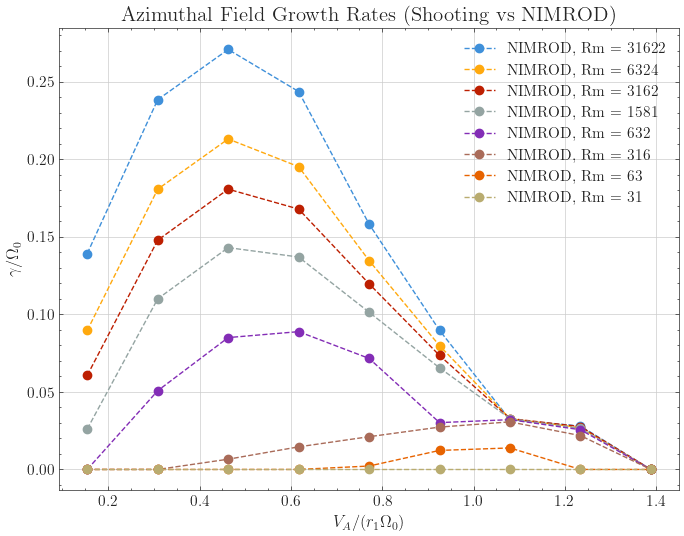

In [5]:
### AR1
# %%
smrm = 1/2.0510130839719898e-07/10000/25298.2
# smrm=1
W0 = 252982
# Bs = np.asarray([   0 ,    5 ,   10 ,   15 ,   20 ,   25 ,   30 ,   35 ,   40 ,   45 ,   50 ,   55 ,   60 ,   65 ,   70 ,   75 ,   80 ])*smrm
Bs = np.asarray([   0 ,    5 ,   10 ,   15 ,   20 ,   25 ,   30 ,   35 ,   40 ,   45 ,   50 ,   55 ,   60 ,   65 ,   70 ,   75 ,   80 ])/(r1*Omega0*np.sqrt(rho*mu_0)*10000)

gs = [   0 ,    0 ,1.02e4,2.24e4,2.99e4,3.32e4,3.28e4,2.93e4,2.40e4,1.85e4,0.76e4,0.82e4,0.80e4,0.61e4,0.25e4,    0 ,    0 ]

### IMPORT MY DATA
r1_AR1 = 0.1
r2_AR1 = 0.5

## Get Alfven via input data
magB = [10, 20, 30, 40, 50, 60, 70, 80, 90]
vA = magB/np.sqrt(rho*mu_0)/10000

## AR1 Data
eta = ['0.1', '0.5', '1', '2', '5']
eta = ['0.1', '0.5', '1', '2', '5', '10', '50', '100']

### REVISION 3 WITH DTMS DATA
gr_10g = [44016.9, 28334.8, 19181.1,8262.29, 0, 0, 0, 0] ## WAITING ON 10 ETA 5
gr_20g = [75370.2, 57125.3, 46733.3,34777.3, 16046.7, 0, 0,0 ]
gr_30g = [85609.5, 67360.8, 57130.9,45215.5, 26877.8, 2088.13, 0,0]
gr_40g = [77029.5, 61718.3, 53070,43300.4, 28089.2, 4607.29, 0,0]
gr_50g = [50007, 42576.1, 37846,32054.6, 22632.4, 6674.49, 695.382, 0]
gr_60g = [28348.8, 25225.8, 23233.5,20705.8, 9544, 8632.65, 3878.04, 0]
gr_70g = [10148.7, 10339.7, 10378.7,10362, 10150.5, 9701.79, 4383.83, 0] ### OTHER ETA0.1 is 18002.2
gr_80g = [8849.72, 8520.59, 8737.85,8353.78, 8098.38, 6897.13, 0, 0]
# gr_90g = [10127.7, 9613.43, 9315.53,8896.36, 9541.62, 0, 0, 0]
gr_90g = [0, 0,0,0, 0, 0, 0, 0]

magB = [10, 20, 30, 40, 50, 60, 70, 80,90]
vA = magB/np.sqrt(rho*mu_0)/10000

gr_tot = [gr_10g, gr_20g, gr_30g, gr_40g, gr_50g, gr_60g, gr_70g, gr_80g,gr_90g]

etaplot_AR1 = []
for i in range(0, len(eta)):
    etai = np.zeros(len(gr_tot))
    for j in range(0, len(gr_tot)):
        etai[j] = gr_tot[j][i]
    etaplot_AR1.append(etai)

# fig = plt.figure()
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

V0 = r1*Omega0
eta_arr = [0.1,0.5,1,2,5,10, 50, 100]
Rm = r1*V0/np.array(eta_arr)
for i in range(0, len(etaplot_AR1)):
    ## Note 8/10 because of scaling w/ bb of other sims
    plt.plot(vA/(r1_AR1*Omega0), etaplot_AR1[i]/(Omega0), 'o', linestyle = '--', label=r'NIMROD, Rm = ' + str(int(Rm[i])), color = color_arr[i])

print(etaplot_AR1)

plt.plot()
plt.xlabel(r'${V_A}/(r_1\Omega_0)$')
plt.ylabel(r'$\gamma/\Omega_0$')
# plt.ylim(-0.01, 0.3)
# plt.legend(frameon=False)
plt.title('Azimuthal Field Growth Rates (Shooting vs NIMROD)',fontsize=15)
# plt.savefig('plots/growthshooting_diffETA_AR1_curv.pdf')
plt.legend()

# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend()
# plt.ylim(0,0.3)

plt.show()
plt.close()


In [6]:
### AR2
ETAp1 = [43901.9, 75288.7, 85502.6, 76841.8, 49832.2, 29791.2, 18548.3, 13093.1, 3976.37]
ETAp5 = [28223.4, 56916.7, 65286.6, 61637.7, 42409.8, 25046.9, 16044, 10842.5, 3748.9]
ETA1 = [19164.2, 46495.2, 56709.9, 53031.9, 37517.9, 23040.2, 14893.2, 10136.4, 3514.04]
ETA2 = [-884.111, 34393.6, 45017.6, 42948.5, 31869, 20687.1, 13276.7, 3533.12, 3792.31]
ETA5 = [-462.852, 15662.4, 26880.6, 27991.8, 22514.6, 15624.5, 10945.5, 0, 3666.12] ## Measure 10g again later.
ETA5_curr= [-462.852, 15662.4, 26880.6, 27991.8, 22514.6, 15624.5, 10945.5, 3666.12] ## Measure 10g again later.

# gr_tot = [gr_10g, gr_20g, gr_30g, gr_40g, gr_50g, gr_60g, gr_70g, gr_80g, gr_90g]
gr_tot_AR2 = [ETAp1, ETAp5, ETA1, ETA2, ETA5]

gauss_ETA5 = [10, 20, 30, 40, 50, 60, 70, 90]
vA_ETA5 = np.zeros([len(gauss_ETA5)])
for j in range(0, len(gauss_ETA5)):
    vA_ETA5[j] = gauss_ETA5[j] / np.sqrt(mu_0*rho)
    

etaplot_AR2 = []
for i in range(0, len(gr_tot_AR2)):
    etai = np.zeros(len(gr_tot_AR2[i]))
    for j in range(0, len(gr_tot_AR2[i])):
        if(gr_tot_AR2[i][j] < 0):
            gr_tot_AR2[i][j] = 0
        etai[j] = gr_tot_AR2[i][j]
    etaplot_AR2.append(etai)

# Import Shooting

In [33]:
import os

path_home = os.getcwd()
b = os.listdir()


# print(b)
dt = 1
eta_arr = np.arange(dt, 50 + dt, dt)
r1 = 0.1 # cm to m
V0 = r1*Omega0
Rm = r1*V0/eta_arr
print(eta_arr)


diff_modes = ['MCI_2k1'] ### ad 10k1 when done
print(len(diff_modes))
print(len(diff_modes))


e = []
f1 = []
for k in range(0,len(diff_modes)):
    d = []
    d1 = []

    if(diff_modes[k] == 'MCI_2k1'):
        eta_arr = np.arange(1, 50, 1)
    elif(diff_modes[k] ==  'MCI_3k1'):
        eta_arr = np.arange(1, 90 + dt, dt)
    elif(diff_modes[k] ==  'MRI_4k1'):
        eta_arr = np.arange(1, 53 + dt, dt)
    elif(diff_modes[k] ==  'MRI_6k1'):
        eta_arr = np.arange(1, 78 + dt, dt)
    elif(diff_modes[k] ==  'MRI_8k1'):
        eta_arr = np.arange(1, 70 + dt, dt)
    elif(diff_modes[k] ==  'MRI_10k1'):
        eta_arr = np.arange(1, 56 + dt, dt)
    else:
        eta_arr = np.arange(dt, 50 + dt, dt)
        
        
    for l in eta_arr:
        # print(l)
        elecd_str = f'{l}'

        guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        
    
        with open(guesses_str_d, 'rb') as f:
            guesses_1k1_MCI_l = pickle.load(f)    
        with open(guesses_str_u, 'rb') as f:
            guesses_1k1_MCI_h = pickle.load(f)    
        
        with open(VA_d, 'rb') as f:
            VA_l_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)    
        with open(VA_u, 'rb') as f:
            VA_h_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)   
            
        gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4= []
        gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
        for j in range(0,len(guesses_1k1_MCI_h) ):
            gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
        freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4 = []
        freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
            
        for j in range(0,len(guesses_1k1_MCI_h)):
            freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)

    
        e12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        f12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        VA12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        # e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        # VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
        e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        f12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
    
        e12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        f12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        VA12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = VA_h_MCI1_Bz_ETA1_divr_WKB_div4[1:len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)]
    
        VA_N_total = VA12
        gr_tot = e12
        # print(len(gr_tot))
        # print(j)
        d.append(gr_tot)
        d1.append(f12)

    # print(len(d))
    e.append(d)
    f1.append(d1)
eta_arr = np.arange(dt, 50 + dt, dt)
e11_MCI = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))
f11_MCI = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))

# print(len(d))
print(np.shape(e11_MCI))
for k in range(0,len(diff_modes)):
    len_eta = len(e[k])
    for j in range(0,len_eta):
        e11_MCI[0:len(e[k][j]),j,k] = e[k][j][:]
        f11_MCI[0:len(f1[k][j]),j,k] = f1[k][j][:]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
1
1
(1601, 50, 1)


In [34]:
import os

path_home = os.getcwd()
b = os.listdir()


# print(b)
dt = 1
eta_arr = np.arange(dt, 50 + dt, dt)
r1 = 0.1 # cm to m
V0 = r1*Omega0
Rm = r1*V0/eta_arr
print(eta_arr)


diff_modes = ['MRI_2k1'] ### ad 10k1 when done
print(len(diff_modes))
print(len(diff_modes))


e = []
f1 = []
for k in range(0,len(diff_modes)):
    d = []
    d1 = []

    if(diff_modes[k] ==  'MCI_2k1'):
        eta_arr = np.arange(1, 92 + dt, dt)
    elif(diff_modes[k] ==  'MCI_3k1'):
        eta_arr = np.arange(1, 90 + dt, dt)
    elif(diff_modes[k] ==  'MRI_4k1'):
        eta_arr = np.arange(1, 53 + dt, dt)
    elif(diff_modes[k] ==  'MRI_6k1'):
        eta_arr = np.arange(1, 78 + dt, dt)
    elif(diff_modes[k] ==  'MRI_8k1'):
        eta_arr = np.arange(1, 70 + dt, dt)
    elif(diff_modes[k] ==  'MRI_10k1'):
        eta_arr = np.arange(1, 56 + dt, dt)
    else:
        eta_arr = np.arange(dt, 50 + dt, dt)
        
        
    for l in eta_arr:
        # print(l)
        elecd_str = f'{l}'
    
        guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'
        VA_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq.pkl'

        if(diff_modes[k] == "MRI_2k1"):
            guesses_str_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesu_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
            guesses_str_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_guessesd_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
            VA_u = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANUP_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
            VA_d = f'Shooting-AlfvenSweep-Scaled-Data/' + diff_modes[k] + '_VANDOWN_' + elecd_str + '-kep-Bz-res-divr-q2magpisq-v2.pkl'
        
    
        with open(guesses_str_d, 'rb') as f:
            guesses_1k1_MCI_l = pickle.load(f)    
        with open(guesses_str_u, 'rb') as f:
            guesses_1k1_MCI_h = pickle.load(f)    
        
        with open(VA_d, 'rb') as f:
            VA_l_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)    
        with open(VA_u, 'rb') as f:
            VA_h_MCI1_Bz_ETA1_divr_WKB_div4 = pickle.load(f)   
            
        gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4= []
        gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].imag)
        for j in range(0,len(guesses_1k1_MCI_h) ):
            gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].imag)    
        freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4 = []
        freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4 = []
        for j in range(0,len(guesses_1k1_MCI_l)):
            freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_l[j].real)
            
        for j in range(0,len(guesses_1k1_MCI_h)):
            freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4.append(guesses_1k1_MCI_h[j].real)

    
        e12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        f12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        VA12 = np.zeros(len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4) - 1)
        # e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        # VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
        e12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(gr_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        f12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(freq_1k1_MCI_l_Bz_ETA1_divr_WKB_div4[:])
        VA12[0:len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4)] = np.flip(VA_l_MCI1_Bz_ETA1_divr_WKB_div4[:])
    
        e12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        f12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = freq_1k1_MCI_h_Bz_ETA1_divr_WKB_div4[1:len(gr_1k1_MCI_h_Bz_ETA1_divr_WKB_div4)]
        VA12[len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4):len(VA_l_MCI1_Bz_ETA1_divr_WKB_div4) + len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)-1] = VA_h_MCI1_Bz_ETA1_divr_WKB_div4[1:len(VA_h_MCI1_Bz_ETA1_divr_WKB_div4)]
    
        VA_N_total = VA12
        gr_tot = e12
        # print(len(gr_tot))
        # print(j)
        d.append(gr_tot)
        d1.append(f12)

    # print(len(d))
    e.append(d)
    f1.append(d1)
eta_arr = np.arange(dt, 50 + dt, dt)
e11_MRI = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))
f11_MRI = np.zeros((len(gr_tot), len(eta_arr), len(diff_modes)))

# print(len(d))
print(np.shape(e11_MRI))
for k in range(0,len(diff_modes)):
    len_eta = len(e[k])
    for j in range(0,len_eta):
        e11_MRI[0:len(e[k][j]),j,k] = e[k][j][:]
        f11_MRI[0:len(f1[k][j]),j,k] = f1[k][j][:]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
1
1
(1602, 50, 1)


# Analyze

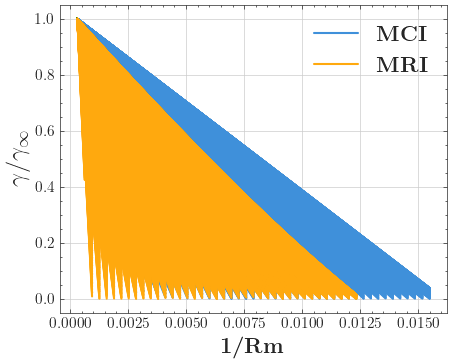

In [38]:
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

plt.figure(figsize = (5,4))
Rm_arr = (r1**2*Omega0)/eta_arr
ii_ind = np.linspace(100, len(e11_MCI)-1, 2000)
tol = 1E-3
for j in range(0, len(ii_ind)):
    ii = int(ii_ind[j])
    ii_g = np.where(e11_MCI[ii,:,0]/np.abs(e11_MCI[ii,0,0]) > 0)
    gr_cut = (e11_MCI[ii,:,0]/np.abs(e11_MCI[ii,0,0]))[ii_g[:]]
    eta_cut = eta_arr[ii_g[:]]
    Rm_arr = (r1**2*Omega0)/eta_cut
    if(len(gr_cut > 1)):
        if(np.abs(np.max(gr_cut)- 1) < tol):
            if(j == 0):
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[0], label = r'\textbf{MCI}', linewidth = 1.5)
            else:
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[0], linewidth = 1.5)
for j in range(0, len(ii_ind)):
    ii = int(ii_ind[j])
    ii_g = np.where(e11_MRI[ii,:,0]/np.abs(e11_MRI[ii,0,0]) > 0)
    gr_cut = (e11_MRI[ii,:,0]/np.abs(e11_MRI[ii,0,0]))[ii_g[:]]
    eta_cut = eta_arr[ii_g[:]]
    Rm_arr = (r1**2*Omega0)/eta_cut
    if(len(gr_cut > 1)):
        if(np.abs(np.max(gr_cut)- 1) < tol):
            if(j == 0):
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[1], label = r'\textbf{MRI}', linewidth = 1.5)
            else:
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[1], linewidth = 1.5)
plt.ylabel(r'$\mathbf{\gamma/\gamma_\infty}$', fontsize = 18)
plt.xlabel(r'\textbf{1/Rm}', fontsize = 16)
plt.legend(fontsize = 16)
plt.savefig('MCI-MRI-Scaling-2k1.pdf')
plt.show()


Defining constants...
Constants defined: r1=0.1, Omega0=316227.77
eta_arr defined: (50,), min=1, max=50
Loading data for mode: MCI_2k1...
Finished loading MCI_2k1. Shape: (1601, 50)
Loading data for mode: MRI_2k1...
Finished loading MRI_2k1. Shape: (1602, 50)
Data loading complete.

--- Calculating Average for MCI ---
Starting data collection for 1601 VA points...
Finished collection. Found 681 valid lines.
Starting averaging...
Common Rm axis: 63.2456 to 3162.2777
Average calculated.

--- Calculating Average for MRI ---
Starting data collection for 1602 VA points...
Finished collection. Found 742 valid lines.
Starting averaging...
Common Rm axis: 81.0840 to 3162.2777
Average calculated.

Setting up plot...
Plotting average MCI line...
Plotting average MRI line...


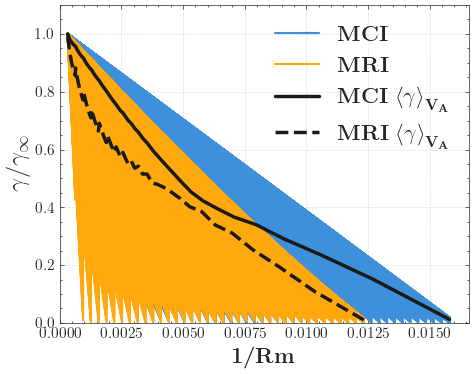

Plot displayed.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
try:
    import cPickle as pickle
except ImportError:
    import pickle
color_arr = ['#3F90DA', '#FFA90E', '#BD1F01', '#94A4A2', '#832DB6', '#A96B59', '#E76300', '#B9AC70', '#92DADD']

# --- Helper Function for Data Loading (Adapted from Resistive-Scaling.ipynb) ---
def load_mode_data(mode_name, data_path, eta_load_range):
    """Loads growth rate and frequency data for a specific mode."""
    print(f"Loading data for mode: {mode_name}...")
    e_list = []
    f_list = []
    first_load = True
    expected_len_gr = -1

    for l in eta_load_range:
        elecd_str = f'{l}'
        # Construct file paths
        guesses_str_u = f'{data_path}{mode_name}_guessesu_{elecd_str}-kep-Bz-res-divr-q2magpisq.pkl'
        guesses_str_d = f'{data_path}{mode_name}_guessesd_{elecd_str}-kep-Bz-res-divr-q2magpisq.pkl'
        VA_u = f'{data_path}{mode_name}_VANUP_{elecd_str}-kep-Bz-res-divr-q2magpisq.pkl'
        VA_d = f'{data_path}{mode_name}_VANDOWN_{elecd_str}-kep-Bz-res-divr-q2magpisq.pkl'

        # Handle MRI_2k1 v2 files specifically as in notebook
        if mode_name == "MRI_2k1":
            # Check if v2 files exist, otherwise fallback or error
            guesses_str_u_v2 = guesses_str_u.replace('.pkl', '-v2.pkl')
            guesses_str_d_v2 = guesses_str_d.replace('.pkl', '-v2.pkl')
            VA_u_v2 = VA_u.replace('.pkl', '-v2.pkl')
            VA_d_v2 = VA_d.replace('.pkl', '-v2.pkl')
            if os.path.exists(guesses_str_u_v2): # Prefer v2 if it exists
                 guesses_str_u = guesses_str_u_v2
                 guesses_str_d = guesses_str_d_v2
                 VA_u = VA_u_v2
                 VA_d = VA_d_v2
            else:
                 print(f"Note: MRI_2k1 v2 files not found for eta={l}, using original names.")


        # Load the pickle files
        try:
            with open(guesses_str_d, 'rb') as f: guesses_l = pickle.load(f)
            with open(guesses_str_u, 'rb') as f: guesses_h = pickle.load(f)
            with open(VA_d, 'rb') as f: VA_l = pickle.load(f)
            with open(VA_u, 'rb') as f: VA_h = pickle.load(f)
        except FileNotFoundError as fnf_e:
            print(f"Error loading file for eta={l}, mode={mode_name}: {fnf_e}. Skipping eta={l}.")
            # Append placeholders later to maintain structure if needed
            e_list.append(np.array([np.nan] * expected_len_gr) if expected_len_gr > 0 else np.array([]))
            f_list.append(np.array([np.nan] * expected_len_gr) if expected_len_gr > 0 else np.array([]))
            continue

        # Extract data
        gr_l = [guess.imag for guess in guesses_l]
        gr_h = [guess.imag for guess in guesses_h]
        freq_l = [guess.real for guess in guesses_l]
        freq_h = [guess.real for guess in guesses_h]

        # Combine up/down sweeps
        len_l, len_h = len(VA_l), len(VA_h)
        total_len = len_l + len_h - 1
        if total_len <= 0:
            print(f"Warning: No combined data points for eta={l}, mode={mode_name}. Appending NaNs.")
            e_list.append(np.array([np.nan] * expected_len_gr) if expected_len_gr > 0 else np.array([]))
            f_list.append(np.array([np.nan] * expected_len_gr) if expected_len_gr > 0 else np.array([]))
            if first_load: expected_len_gr = 0 # Set expected length if first load fails
            continue

        e12 = np.zeros(total_len)
        f12 = np.zeros(total_len)

        e12[0:len_l] = np.flip(gr_l[:])
        f12[0:len_l] = np.flip(freq_l[:])
        if len_h > 1:
            e12[len_l:total_len] = gr_h[1:len_h]
            f12[len_l:total_len] = freq_h[1:len_h]

        # Store the length and handle inconsistencies
        if first_load:
            expected_len_gr = total_len
            first_load = False
        elif total_len != expected_len_gr:
            print(f"Warning: Inconsistent VA points for eta={l} ({total_len}) vs expected ({expected_len_gr}). Padding/Trimming.")
            if total_len < expected_len_gr:
                pad_width = expected_len_gr - total_len
                e12 = np.pad(e12, (0, pad_width), 'constant', constant_values=np.nan)
                f12 = np.pad(f12, (0, pad_width), 'constant', constant_values=np.nan)
            else:
                e12 = e12[:expected_len_gr]
                f12 = f12[:expected_len_gr]

        e_list.append(e12)
        f_list.append(f12)

    if not e_list or expected_len_gr <= 0: # Check if any data was successfully processed
         print(f"Error: No valid data points loaded for mode {mode_name}.")
         return None, None # Return None if loading fails completely

    # Ensure all inner arrays have the expected length before stacking
    for i in range(len(e_list)):
        current_len = len(e_list[i])
        if current_len < expected_len_gr:
             pad_width = expected_len_gr - current_len
             e_list[i] = np.pad(e_list[i], (0, pad_width), 'constant', constant_values=np.nan)
             f_list[i] = np.pad(f_list[i], (0, pad_width), 'constant', constant_values=np.nan)
        elif current_len > expected_len_gr: # Should not happen with trimming logic, but as safeguard
             e_list[i] = e_list[i][:expected_len_gr]
             f_list[i] = f_list[i][:expected_len_gr]


    # Stack and transpose to get (VA, eta, mode=1) shape
    e_array = np.array(e_list).transpose(1, 0)
    f_array = np.array(f_list).transpose(1, 0)

    print(f"Finished loading {mode_name}. Shape: {e_array.shape}")
    return np.expand_dims(e_array, axis=2), np.expand_dims(f_array, axis=2) # Add mode dimension

# --- Helper Function for Averaging ---
def calculate_average(e11_data, eta_arr, r1, Omega0, tol):
    """Calculates the average line data for a given e11 dataset."""
    if e11_data is None:
        return None, None

    num_VA_points = e11_data.shape[0]
    ii_ind = np.arange(num_VA_points)
    all_gr_cuts = []
    all_rm_arrs = []
    calculation_constant = r1**2 * Omega0

    print(f"Starting data collection for {num_VA_points} VA points...")
    for j, ii in enumerate(ii_ind):
        norm_factor = np.abs(e11_data[ii, 0, 0])
        if norm_factor == 0 or np.isnan(norm_factor): continue

        # Filter based on positive normalized growth rate (eta dimension)
        gr_g = np.where(e11_data[ii, :, 0] / norm_factor > 0)[0]
        if len(gr_g) == 0: continue

        # Get eta values using the GLOBAL eta_arr
        eta_cut = eta_arr[gr_g]

        valid_eta_mask = eta_cut != 0
        if not np.any(valid_eta_mask): continue

        eta_cut_filtered = eta_cut[valid_eta_mask]
        gr_g_filtered = gr_g[valid_eta_mask]

        gr_cut = (e11_data[ii, gr_g_filtered, 0] / norm_factor)

        Rm_arr_cut = calculation_constant / eta_cut_filtered

        sort_indices = np.argsort(Rm_arr_cut)
        Rm_arr_cut_sorted = Rm_arr_cut[sort_indices]
        gr_cut_sorted = gr_cut[sort_indices]

        if len(gr_cut_sorted) > 1 and not np.isnan(np.max(gr_cut_sorted)) and np.abs(np.max(gr_cut_sorted) - 1) < tol:
            all_rm_arrs.append(Rm_arr_cut_sorted)
            all_gr_cuts.append(gr_cut_sorted)

    print(f"Finished collection. Found {len(all_gr_cuts)} valid lines.")

    # Averaging Process
    avg_gr_cut = None
    common_rm = None
    if all_gr_cuts:
        print("Starting averaging...")
        try:
            # Filter out potential empty arrays before min/max
            valid_rm_arrs = [arr for arr in all_rm_arrs if len(arr) > 0 and not np.all(np.isnan(arr))]
            if not valid_rm_arrs:
                 print("No valid Rm arrays found for averaging.")
                 return None, None

            min_rm = min(np.nanmin(arr) for arr in valid_rm_arrs)
            max_rm = max(np.nanmax(arr) for arr in valid_rm_arrs)
            if np.isnan(min_rm) or np.isnan(max_rm) or min_rm >= max_rm:
                 print(f"Invalid Rm range found: min={min_rm}, max={max_rm}. Cannot average.")
                 return None, None

            common_rm = np.linspace(min_rm, max_rm, 200)
            print(f"Common Rm axis: {min_rm:.4f} to {max_rm:.4f}")

            interpolated_gr_cuts = []
            for rm_vals, gr_vals in zip(all_rm_arrs, all_gr_cuts):
                 # Ensure data is valid for interpolation
                 valid_points = np.isfinite(rm_vals) & np.isfinite(gr_vals)
                 rm_vals_clean = rm_vals[valid_points]
                 gr_vals_clean = gr_vals[valid_points]
                 if len(rm_vals_clean) > 1:
                     # Ensure rm_vals_clean is sorted (should be from argsort earlier)
                     # Double-check uniqueness for safety
                     unique_rm, unique_idx = np.unique(rm_vals_clean, return_index=True)
                     if len(unique_rm) > 1:
                         interp_gr = np.interp(common_rm, unique_rm, gr_vals_clean[unique_idx], left=np.nan, right=np.nan)
                         interpolated_gr_cuts.append(interp_gr)

            if interpolated_gr_cuts:
                interpolated_array = np.array(interpolated_gr_cuts)
                avg_gr_cut = np.nanmean(interpolated_array, axis=0)
                print("Average calculated.")
                if np.all(np.isnan(avg_gr_cut)):
                    print("Warning: Average calculation resulted in all NaNs.")
                    avg_gr_cut = None
            else:
                 print("No data suitable for interpolation.")

        except Exception as e:
            print(f"Error during averaging: {e}")
            return None, None # Return None on error
    else:
        print("No valid lines collected.")

    return common_rm, avg_gr_cut

# --- 1. Define Parameters and Load Data ---
print("Defining constants...")
try:
    rho = (1.0*10**19) * (2.0*1.6725*10**(-27))
    mu_0 = 1.2566*10**(-6)
    r1 = 0.1
    bb = 10000
    v0 = bb/np.sqrt(r1)
    Omega0 = v0/r1
    print(f"Constants defined: r1={r1}, Omega0={Omega0:.2f}")

    dt = 1
    eta_arr = np.arange(dt, 50 + dt, dt) # Define the eta array once
    print(f"eta_arr defined: {eta_arr.shape}, min={eta_arr.min()}, max={eta_arr.max()}")

    # Load data for BOTH modes
    data_path = 'Shooting-AlfvenSweep-Scaled-Data/'
    if not os.path.isdir(data_path):
        print(f"Error: Data directory '{data_path}' not found.")
        exit()

    e11_MCI, f11_MCI = load_mode_data('MCI_2k1', data_path, eta_arr)
    e11_MRI, f11_MRI = load_mode_data('MRI_2k1', data_path, eta_arr)

except Exception as e:
    print(f"An unexpected error occurred during setup or data loading: {e}")
    exit()

print("Data loading complete.")

# --- 2 & 3 & 4. Calculate Averages for Each Mode ---
tol = 1E-3

print("\n--- Calculating Average for MCI ---")
common_rm_mci, avg_gr_mci = calculate_average(e11_MCI, eta_arr, r1, Omega0, tol)

print("\n--- Calculating Average for MRI ---")
common_rm_mri, avg_gr_mri = calculate_average(e11_MRI, eta_arr, r1, Omega0, tol)


# --- 5. Plotting ---
print("\nSetting up plot...")
plt.figure(figsize=(5, 4))



for j in range(0, len(ii_ind)):
    ii = int(ii_ind[j])
    ii_g = np.where(e11_MCI[ii,:,0]/np.abs(e11_MCI[ii,0,0]) > 0)
    gr_cut = (e11_MCI[ii,:,0]/np.abs(e11_MCI[ii,0,0]))[ii_g[:]]
    eta_cut = eta_arr[ii_g[:]]
    Rm_arr = (r1**2*Omega0)/eta_cut
    if(len(gr_cut > 1)):
        if(np.abs(np.max(gr_cut)- 1) < tol):
            if(j == 0):
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[0], label = r'\textbf{MCI}', linewidth = 1.5)
            else:
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[0], linewidth = 1.5)

for j in range(0, len(ii_ind)):
    ii = int(ii_ind[j])
    ii_g = np.where(e11_MRI[ii,:,0]/np.abs(e11_MRI[ii,0,0]) > 0)
    gr_cut = (e11_MRI[ii,:,0]/np.abs(e11_MRI[ii,0,0]))[ii_g[:]]
    eta_cut = eta_arr[ii_g[:]]
    Rm_arr = (r1**2*Omega0)/eta_cut
    if(len(gr_cut > 1)):
        if(np.abs(np.max(gr_cut)- 1) < tol):
            if(j == 0):
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[1], label = r'\textbf{MRI}', linewidth = 1.5)
            else:
                plt.plot(1/Rm_arr, gr_cut, color = color_arr[1], linewidth = 1.5)

# Plot Average MCI
if avg_gr_mci is not None and common_rm_mci is not None:
    print("Plotting average MCI line...")
    # Handle potential division by zero if 0 exists in common_rm_mci
    valid_rm_mci = common_rm_mci > 1e-12 # Avoid division by zero or near-zero
    if np.any(valid_rm_mci):
        plt.plot(1.0 / common_rm_mci[valid_rm_mci], avg_gr_mci[valid_rm_mci],
                 color='k', linewidth=2.5, label=r'\textbf{MCI} $\mathbf{\left<\gamma\right>_{V_A}}$')
    else:
        print("No valid positive Rm values for MCI plotting.")
        plt.plot([], [], color=color_arr[0], linewidth=2.5, label=r'$\textbf{Average MCI (Invalid Rm)}$')
else:
    print("Average MCI line could not be calculated.")
    plt.plot([], [], color=color_arr[0], linewidth=2.5, label=r'$\textbf{Average MCI (Not Calculated)}$')

# Plot Average MRI
if avg_gr_mri is not None and common_rm_mri is not None:
    print("Plotting average MRI line...")
    # Handle potential division by zero
    valid_rm_mri = common_rm_mri > 1e-12
    if np.any(valid_rm_mri):
        plt.plot(1.0 / common_rm_mri[valid_rm_mri], avg_gr_mri[valid_rm_mri],
                 color='k', linestyle = '--', linewidth=2.5, label=r'\textbf{MRI} $\mathbf{\left<\gamma\right>_{V_A}}$')
    else:
        print("No valid positive Rm values for MRI plotting.")
        plt.plot([], [], color='k', linestyle = '--', linewidth=2.5, label=r'$\textbf{Average MRI (Invalid Rm)}$')
else:
    print("Average MRI line could not be calculated.")
    plt.plot([], [], color=color_arr[1], linewidth=2.5, label=r'$\textbf{Average MRI (Not Calculated)}$')


# --- Final plot setup ---
plt.ylim(0, 1.1)
# Adjust xlim based on combined valid range
max_inv_rm_mci = np.nanmax(1.0 / common_rm_mci[common_rm_mci > 1e-12]) if common_rm_mci is not None and np.any(common_rm_mci > 1e-12) else 0
max_inv_rm_mri = np.nanmax(1.0 / common_rm_mri[common_rm_mri > 1e-12]) if common_rm_mri is not None and np.any(common_rm_mri > 1e-12) else 0
max_inv_rm = max(max_inv_rm_mci, max_inv_rm_mri, 0.01) # Ensure at least a small positive range

plt.xlim(left=0, right=max_inv_rm * 1.05)

plt.ylabel(r'$\mathbf{\gamma/\gamma_\infty}$', fontsize = 18)
plt.xlabel(r'\textbf{1/Rm}', fontsize = 16)
plt.legend(fontsize = 16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# --- Save or Show Plot ---
try:
    # plt.savefig('Average_MCI_MRI_Plot_Loaded.pdf')
    # print("Plot saved as Average_MCI_MRI_Plot_Loaded.pdf")
    plt.savefig('MCI-MRI-Scaling-2k1.pdf')
    plt.show()
    print("Plot displayed.")
except Exception as e:
    print(f"An error occurred during plotting: {e}")